<a href="https://colab.research.google.com/github/lourdesvaca/repository-algoritmica-avanzada-2023-2/blob/algoritmica-avanzada/AA_MNS_KMeans_DatasetMallCustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto final

Entrenador de modelo dinámico *(predictivo, clasificatorio, agrupacion)* *texto en cursiva*

recibe cualquier dataset
permite seleccionar
qué deseo hacer? clasificar...
con qué columnas voy a trabajar?
Implementar interfaz gráfica en python al proyecto utilizando la
libreria: **tkinter**

todo lo aprendido automatizado, con interfaz grafica, salida huminazada y permitir el ingreso de datos desde la interfaz
**fecha de presentación: 05 de diciembre**

##Realizamos una práctica con el dataset "Mall Customers"

La información del dataset se encuentra en el siguiente enlace: https://www.kaggle.com/datasets/kondapuramshivani/mall-customerscsv

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar el dataset
df = pd.read_csv('Mall_Customers (1).csv')

In [5]:
# Familiarizarnos con el dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.Gender = df.Gender.map({'Male': 1, 'Female': 2})

In [7]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,1.000000,18.000000,15.000000,1.000000
25%,50.750000,1.000000,28.750000,41.500000,34.750000
50%,100.500000,2.000000,36.000000,61.500000,50.000000
75%,150.250000,2.000000,49.000000,78.000000,73.000000
max,200.000000,2.000000,70.000000,137.000000,99.000000


In [8]:
df.drop(['CustomerID', 'Gender'], axis=1, inplace=True)

In [9]:
centers = range(1, 9)

In [10]:
clusters = [KMeans(n_clusters=center, n_init=10) for center in centers]

In [11]:
scores = [model.fit(df).score(df) for model in clusters]

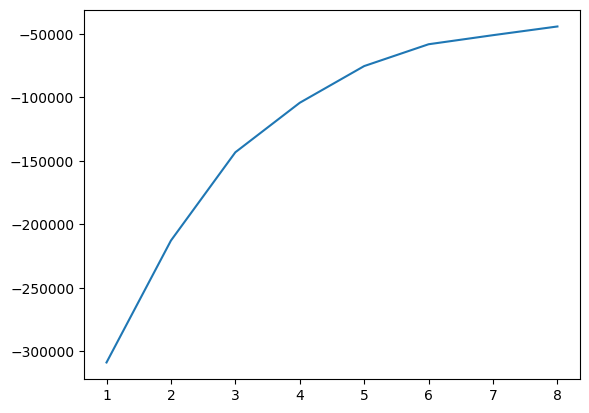

In [12]:
# Graficamos la curva
plt.plot(centers, scores)
plt.show()

In [13]:
k_means_model = KMeans(n_clusters=6, n_init=10)

In [14]:
k_means_model.fit(df)

KMeans(n_clusters=6, n_init=10)

In [15]:
k_means_model.cluster_centers_

array([[32.69230769, 86.53846154, 82.12820513],
       [56.15555556, 53.37777778, 49.08888889],
       [41.68571429, 88.22857143, 17.28571429],
       [27.        , 56.65789474, 49.13157895],
       [25.27272727, 25.72727273, 79.36363636],
       [44.14285714, 25.14285714, 19.52380952]])

Ahora con los valores obtenidos debemos de saber interpretarlos para realizar la función y su posterior salidad humanizada.

Los datos que tenemos son los siguientes:
* edad
* ingresos
* gastos

En base a esta informacióno, ¿El supermercado cómo puede aumentar sus ventas y atraer nuevos clientes?

Opciones de salida humanizada:
* Creamos un label con las categorias que se presentan, es decir, trabajamos con los centroides.
* Tener en cuenta que los centroies deben de coincidir que las categorias que deseamos asignar, tener cuidado ya que si esto está mal el kmeans le asignará una categoria errónea

In [16]:
#los centroides deben ser iguales a los centroides que se muestran luego de correr: k_means_model.cluster_centers_
label = ['Clientes beneficios',
         'Clientes estrella',
         'Clientes conservadores',
         'Clientes cazaofertas',
         'Clientes estandar',
         'Clientes potenciales',
         ]

In [17]:
#creo una columna y le pido que me asigne los valores del modelo
df['CustomerType'] = k_means_model.labels_

In [18]:
df.to_csv('Mall_Customers_Classified.csv')

In [19]:
def tran_and_predict_model(model, x,y,x_for_predict, labels):
  model.fit(x,y)
  print(f'Score: {round(model.score(x,y), 4)*100} %')
  print(f'Valor predecido: {labels[model.predict(x_predict)[0]]} %')

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [24]:

x_predict = [[47,19.5,27.786]]
x = df.drop('CustomerType', axis='columns')
y = df.CustomerType
tree_classifier = DecisionTreeClassifier()

In [26]:
tran_and_predict_model(tree_classifier,x,y,x_predict, label)

Score: 100.0 %
Valor predecido: Clientes potenciales %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
